In [2]:
import sympy as smp
from sympy import *

In [3]:
x, y = smp.symbols('x y')

# Limits

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [4]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

$$ \lim_{x \to 0^+} \frac{2e^{1/x}}{e^{1/x}+1} $$

In [5]:
smp.limit(2*smp.exp(1/x) / (smp.exp(1/x)+1), x, 0, dir='+')

2

$$ \lim_{x \to 0^-} \frac{2e^{1/x}}{e^{1/x}+1} $$

In [6]:
smp.limit(2*smp.exp(1/x) / (smp.exp(1/x)+1), x, 0, dir='-')

0

$$ \lim_{x \to \infty} \frac{\cos(x)-1}{x} $$

In [7]:
from sympy import oo

In [8]:
smp.limit((smp.cos(x) - 1)/x, x, smp.oo)

0

In [9]:
smp.limit((smp.cos(x) - 1)/x, x, oo)

0

# Derivatives

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [10]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$ \frac{d}{dx} (\log_5 (x))^{x/2}$$

In [11]:
smp.diff(smp.log(x, 5)**(x/2), x)

(log(x)/log(5))**(x/2)*(log(log(x)/log(5))/2 + 1/(2*log(x)))

$$\frac{d}{dx} f(x+g(x)) $$

In [12]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [13]:
smp.diff(f,x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

# Basic Antiderivatives

$$ \int \csc(x) \cot (x)  dx $$

In [14]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

$$ \int 4 \sec (3x) \tan(3x)dx $$

In [15]:
smp.integrate(4*smp.sec(3*x)*smp.tan(3*x), x)

4/(3*cos(3*x))

$$ \int \left( \frac{2}{\sqrt{1-x^2}} - \frac{1}{x^{1/4}}\right) dx$$

In [16]:
smp.integrate(2/smp.sqrt(1-x**2) - 1/x**smp.Rational(1,4), x)

-4*x**(3/4)/3 + 2*asin(x)

# Solving system of equations 

In [36]:
from sympy import solve

x, y = smp.symbols('x y')
solve(x - 3, x)

[3]

In [39]:
from sympy import solve

x, y = smp.symbols('x y')
solve((x - 1)*(y - 2))

[{x: 1}, {y: 2}]

In [40]:
e = a*x + b - 2*x - 3
solve(e,x)

[(3 - b)/(a - 2)]

In [41]:
solve(e,a)

[(-b + 2*x + 3)/x]

## Plotting 

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

x, y = smp.symbols('x y')
y=smp.exp(x**2+smp.sqrt(x))
y

exp(sqrt(x) + x**2)

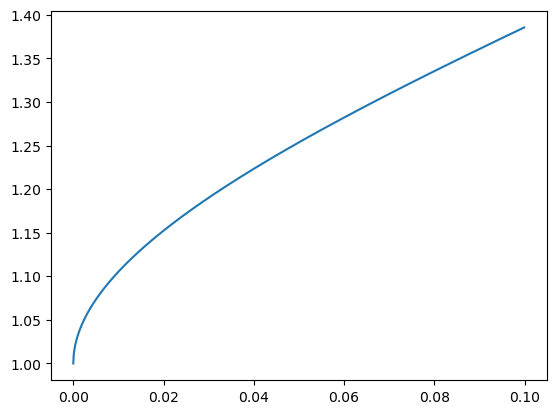

In [64]:
y_f=smp.lambdify([x],y)
x=np.arange(0,0.1,1e-4)
plt.plot(x,y_f(x))

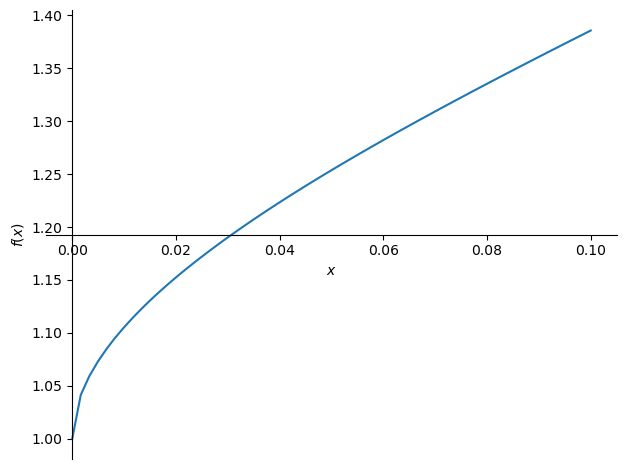

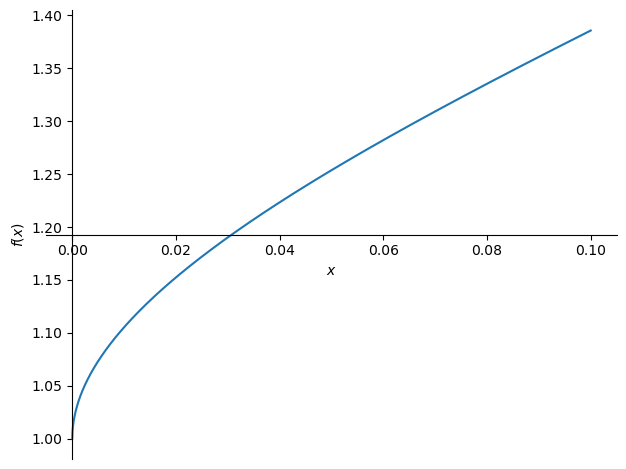

In [74]:
plot(y, (x, 0, 0.1))
#https://docs.sympy.org/latest/modules/plotting.html
plot(y, (x, 0, 0.1),adaptive=False, nb_of_points=10000)


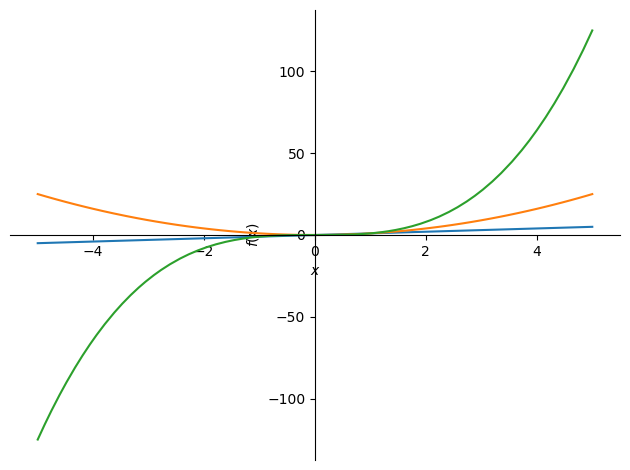

In [42]:
plot(x, x**2, x**3, (x, -5, 5))

## Initial Value Problems

1. Given $\frac{dy}{dx} = 8x + \csc^2(x)$ with $y(\pi/2) = -7$  solve for $y(x)$

In [17]:
integral = smp.integrate(8*x + smp.csc(x)**2, x)
integral

4*x**2 - cos(x)/sin(x)

In [33]:
integral.subs(x, smp.pi/2)

pi**2

In [18]:
C = - integral.subs(x, smp.pi/2) - 7
y = integral + C

In [19]:
y.subs(x, smp.pi/2)

-7

In [20]:
y

4*x**2 - pi**2 - 7 - cos(x)/sin(x)

## Differential equations

In [83]:
from sympy import symbols, dsolve
from sympy import Function
t = symbols('t')
y = Function('y')
dydt=diff(y(t), t, 1)
d2ydt2=diff(y(t), t, 2)
result = dsolve(d2ydt2+3*dydt+2*y(t), y(t))
result

Eq(y(t), (C1 + C2*exp(-t))*exp(-t))

In [90]:
from sympy import symbols, dsolve
from sympy import Function
t = symbols('t')
y = Function('y')
dydt=diff(y(t), t, 1)
d2ydt2=diff(y(t), t, 2)
result1 = dsolve(d2ydt2+3*dydt+2*y(t), y(t),ics={y(0): 0})
result = dsolve(d2ydt2+3*dydt+2*y(t), y(t),ics={y(0): 0,diff(y(t), t, 1).subs(t,0):1})
result1
result


Eq(y(t), (1 - exp(-t))*exp(-t))

# More Complicated Expressions

 $$\int \frac{(1+\sqrt{x})^{1/3}}{\sqrt{x}} dx$$

In [21]:
smp.integrate((1+smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x), x)

3*sqrt(x)*(sqrt(x) + 1)**(1/3)/2 + 3*(sqrt(x) + 1)**(1/3)/2

$$\int x (1-x^2)^{1/4} dx$$

In [22]:
smp.integrate(x*(1-x**2)**smp.Rational(1/4), x)

2*x**2*(1 - x**2)**(1/4)/5 - 2*(1 - x**2)**(1/4)/5

$$ \int \frac{(2x-1)\cos(\sqrt{3(2x-1)^2+6})}{\sqrt{3(2x-1)^2+6}} dx $$

In [23]:
smp.integrate((2*x -1)*smp.cos(smp.sqrt(3*(2*x-1)**2 + 6)) / smp.sqrt(3*(2*x-1)**2 + 6), x)

sin(sqrt(3*(2*x - 1)**2 + 6))/6

# Definite Integrals

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [24]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$\int_1^t x^{10} e^x dx $$

In [25]:
t= smp.symbols('t')

In [26]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Improper Integrals

$$ \int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx $$

In [27]:
smp.integrate(16*smp.atan(x) / (1+x**2), (x, 0, smp.oo))

2*pi**2

# Sequences and Series

In [28]:
n = smp.symbols('n')

$$ \sum_{n=0}^\infty \frac{6}{4^n} $$

In [29]:
smp.Sum(6/4**n, (n,0,smp.oo)).doit()

8

$$ \sum_{n=0}^\infty \frac{2^{n+1}}{5^n} $$

In [30]:
smp.Sum(2**(n+1) / 5**n, (n,0,smp.oo)).doit()

10/3

$$ \sum_{n=1}^{\infty} \frac{\tan^{-1}(n)}{n^{1.1}} $$

In [31]:
smp.Sum(smp.atan(n)/n**smp.Rational(11,10), (n,1,smp.oo)).doit()

Sum(atan(n)/n**(11/10), (n, 1, oo))

$$ \sum_{n=1}^\infty \frac{1 + \cos(n)}{n^2}$$

In [32]:
smp.Sum((1+smp.cos(n))/n**2, (n,1,smp.oo)).n()

1.969